In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

%matplotlib inline

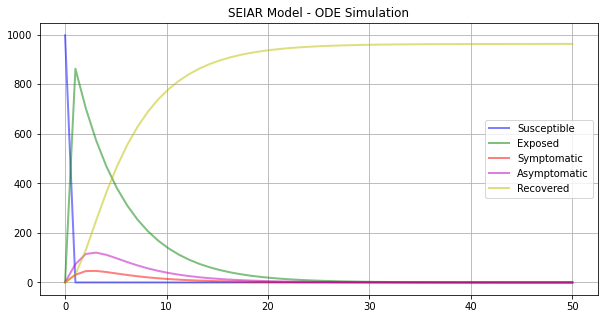

In [2]:
N = 1000

# set initial condition
E, I, A, R = 1, 1, 1, 0
S = N - E - I - A - R

beta_IH, beta_AH = 0.5, 0.45 # transmission rate 
gamma = 0.2 # incubation rate
theta = 0.3 # proportion showing symptom
lam = 0.7 # infection period (1/lambda)
delta = 0.1 # death rate per day

t = np.linspace(0, 50, 50)

# define ODE system
def deriv(y, t, beta_IH, beta_AH, gamma, theta, lam, delta):

    S, E, I, A, R = y

    dSdt = -1 * S * (beta_IH * (I) + beta_AH * (A))
    dEdt = (S * (beta_IH * (I) + beta_AH * (A))) - gamma * E
    dIdt = (theta * gamma * E) - (lam * I) - (delta * I)
    dAdt = ((1 - theta) * gamma * E) - (lam * A)
    dRdt = lam * (I + A)

    return dSdt, dEdt, dIdt, dAdt, dRdt

# combine initial condition
y0 = S, E, I, A, R

# solve ODE
ret = odeint(deriv, y0, t, args=(beta_IH, beta_AH, gamma, theta, lam, delta))
S, E, I, A, R = ret.T

# plot ODE
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title(f'SEIAR Model - ODE Simulation')
ax.plot(t, S, 'b-', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E, 'g-', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I, 'r-', alpha=0.5, lw=2, label='Symptomatic')
ax.plot(t, A, 'm-', alpha=0.5, lw=2, label='Asymptomatic')
ax.plot(t, R, 'y-', alpha=0.5, lw=2, label='Recovered')
ax.legend()
ax.grid()
plt.show()